# Table of Contents
 <p><div class="lev2 toc-item"><a data-toc-modified-id="Load-dadi-module-01" href="#Load-dadi-module"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Load dadi module</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Import-custom-models-02" href="#Import-custom-models"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Import custom models</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Load-the-data-03" href="#Load-the-data"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Load the data</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Set-grid-size-for-extrapolation-04" href="#Set-grid-size-for-extrapolation"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Set grid size for extrapolation</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Create-demographic-model-function-05" href="#Create-demographic-model-function"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Create demographic model function</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Set-parameter-bounds-and-initial-values-06" href="#Set-parameter-bounds-and-initial-values"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Set parameter bounds and initial values</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Optimisation-07" href="#Optimisation"><span class="toc-item-num">0.7&nbsp;&nbsp;</span>Optimisation</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Analysis-of-optimisation-result-08" href="#Analysis-of-optimisation-result"><span class="toc-item-num">0.8&nbsp;&nbsp;</span>Analysis of optimisation result</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Simulation-from-estimated-model-09" href="#Simulation-from-estimated-model"><span class="toc-item-num">0.9&nbsp;&nbsp;</span>Simulation from estimated model</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Parameter-uncertainty-010" href="#Parameter-uncertainty"><span class="toc-item-num">0.10&nbsp;&nbsp;</span>Parameter uncertainty</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Folded-data-011" href="#Folded-data"><span class="toc-item-num">0.11&nbsp;&nbsp;</span>Folded data</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Likelihood-Ratio-Test-(LRT)-between-models-012" href="#Likelihood-Ratio-Test-(LRT)-between-models"><span class="toc-item-num">0.12&nbsp;&nbsp;</span>Likelihood Ratio Test (LRT) between models</a></div>

## Load dadi module

In [11]:
%pwd

u'/data3/claudius/Big_Data/DADI/dadiExercises'

In [12]:
import dadi

ImportError: No module named dadi

I have not installed dadi globally on huluvu. Instead, I left it in my Downloads directory '/home/claudius/Downloads/dadi'. In order for Python to find that module, I need to add that directory to the PYTHONPATH variable.

In [13]:
import sys

sys.path # get the PYTHONPATH variable

['',
 '/usr/local/anaconda2/lib/python27.zip',
 '/usr/local/anaconda2/lib/python2.7',
 '/usr/local/anaconda2/lib/python2.7/plat-linux2',
 '/usr/local/anaconda2/lib/python2.7/lib-tk',
 '/usr/local/anaconda2/lib/python2.7/lib-old',
 '/usr/local/anaconda2/lib/python2.7/lib-dynload',
 '/usr/local/anaconda2/lib/python2.7/site-packages/Sphinx-1.3.5-py2.7.egg',
 '/usr/local/anaconda2/lib/python2.7/site-packages/setuptools-20.3-py2.7.egg',
 '/usr/local/anaconda2/lib/python2.7/site-packages',
 '/usr/local/anaconda2/lib/python2.7/site-packages/IPython/extensions',
 '/home/claudius/.ipython']

In [14]:
sys.path.insert(0, '/home/claudius/Downloads/dadi') # add path to dadi at beginning of list
sys.path

['/home/claudius/Downloads/dadi',
 '',
 '/usr/local/anaconda2/lib/python27.zip',
 '/usr/local/anaconda2/lib/python2.7',
 '/usr/local/anaconda2/lib/python2.7/plat-linux2',
 '/usr/local/anaconda2/lib/python2.7/lib-tk',
 '/usr/local/anaconda2/lib/python2.7/lib-old',
 '/usr/local/anaconda2/lib/python2.7/lib-dynload',
 '/usr/local/anaconda2/lib/python2.7/site-packages/Sphinx-1.3.5-py2.7.egg',
 '/usr/local/anaconda2/lib/python2.7/site-packages/setuptools-20.3-py2.7.egg',
 '/usr/local/anaconda2/lib/python2.7/site-packages',
 '/usr/local/anaconda2/lib/python2.7/site-packages/IPython/extensions',
 '/home/claudius/.ipython']

In [15]:
import dadi, numpy

## Import custom models

I am going to analyise and example data set that comes with dadi.

In [16]:
% ll /home/claudius/Downloads/dadi/examples/YRI_CEU/

total 48
drwxrwxr-x 2 claudius  4096 Feb 17 11:39 bootstraps/
-rw-rw-r-- 1 claudius  2622 Feb 17 11:39 demographic_models.py
-rw-rw-r-- 1 claudius  3099 Mar 15 09:55 demographic_models.pyc
-rw-rw-r-- 1 claudius  7900 Feb 17 11:39 YRI_CEU.fs
-rw-rw-r-- 1 claudius 20094 Feb 17 11:39 YRI_CEU.png
-rw-rw-r-- 1 claudius  7991 Feb 17 11:39 YRI_CEU.py


The Python script `YRI_CEU.py` contains example code for the analysis of these two human population samples.

In [17]:
! head /home/claudius/Downloads/dadi/examples/YRI_CEU/demographic_models.py

"""
Custom demographic model for our example.
"""
import numpy
import dadi

def prior_onegrow_mig((nu1F, nu2B, nu2F, m, Tp, T), (n1,n2), pts):
    """
    Model with growth, split, bottleneck in pop2, exp recovery, migration



The file `demographic_models.py` contains function definitions for custom demographic models.

In [18]:
%quickref

In [19]:
# insert path where file with model functions resides
sys.path.insert(0, '/home/claudius/Downloads/dadi/examples/YRI_CEU/')

# load custom demographic model functions into current namespace
import demographic_models

## Load the data

In [20]:
% ll /home/claudius/Downloads/dadi/examples/YRI_CEU/

total 48
drwxrwxr-x 2 claudius  4096 Feb 17 11:39 bootstraps/
-rw-rw-r-- 1 claudius  2622 Feb 17 11:39 demographic_models.py
-rw-rw-r-- 1 claudius  3099 Mar 15 09:55 demographic_models.pyc
-rw-rw-r-- 1 claudius  7900 Feb 17 11:39 YRI_CEU.fs
-rw-rw-r-- 1 claudius 20094 Feb 17 11:39 YRI_CEU.png
-rw-rw-r-- 1 claudius  7991 Feb 17 11:39 YRI_CEU.py


In [21]:
! cat /home/claudius/Downloads/dadi/examples/YRI_CEU/YRI_CEU.fs

21 21 
nan 1505.721985213899 430.6082121707036 223.6280617335962 133.0413413088248 88.52601752754229 65.90636430764097 49.0000242243171 36.49370238010697 26.43817069812249 19.86214952334856 16.95766334931866 16.06033599115347 14.82456456819106 11.885542008532 7.744463446292672 3.973746809686413 1.752864147390121 1.039759934086901 0.6697982528333183 0.1963211568193445 3842.972452752669 185.2037721164112 123.4164792735226 90.49888906277334 72.05253345848469 58.71765542505418 50.45147448860831 45.74962646203179 40.59569879454973 33.72860415487282 27.06095055215234 21.93829919585865 17.97017460840617 14.33963679654744 10.67612301648367 7.120790728421752 4.250393316903829 2.287466768975575 1.417442955558849 0.7840316983663741 0.236461131352045 1427.24152011533 149.1684657560176 90.61702913246906 63.14754531564202 50.31042470038281 43.56301509782539 37.83904845428278 31.65921604234235 25.63678907480523 20.6385886565992 17.14857769945113 14.7336652336435 12.45748306969472 9.907251221398617 7.

This a 2D SFS format as understood by dadi. It pertains to the two human populations YRI and CEU. 10 Individuals of each population have been sampled. The first 21 numbers should be [YRI: 0, CEU: 0-20]. The following 21 numbers should be [YRI: 1, CEU: 0-20] and so on.

In [22]:
# read in the unfolded 2D SFS from file

data = dadi.Spectrum.from_file('/home/claudius/Downloads/dadi/examples/YRI_CEU/YRI_CEU.fs')

In [23]:
ns = data.sample_sizes
ns

array([20, 20])

Number of samples (or sample size) refers to the number of sampled gene copies.

In [24]:
# flatten the array and get its length

len([ elem for row in data.data for elem in row ])

441

In [25]:
21*21

441

The Spectrum is a 21 $\times$ 21 matrix.

In [ ]:
%quickref

In [ ]:
# print the docstring of the fs object

%pdoc data 

In [ ]:
%pinfo data

In [ ]:
# this prints the source code for the object

%psource data

## Set grid size for extrapolation

In [26]:
pts_l = [40, 50, 60]

dadi will solve the partial differential equation at these three grid sizes and then extrapolate to an infinitely fine grid.

## Create demographic model function

The demographic model we'll is defined in the function `demographic_models.prior_onegrow_mig`. Let's have a look at its definition:

In [ ]:
%psource demographic_models.prior_onegrow_mig

The function first records the required grid size.
It then initialises the phi distribution with this grid.
It then specifies a stepwise change in population size of the ancestral population. This initial ancestral population is implicitly taken as the reference population. The population size parameters `nu1F`, `nu2F` and `nu2B` are relativ to the population size of this initial ancestral population, which is set to 1.
That means, if `nu1F` is greater 1, the model specifies a stepwise increase in population size. The population
stays at this size for a time `Tp`, which is specified in $2N_{ref}$ generation.
Next the model function specifies a population split. One of the daughter populations has the same population size as the ancestral population (African presumably). The other daughter population starts at a population size of `nu2B` and then exponentially increases in size to `nu2F`. During this time of divergence `T`, the two populations exchange gene copies at a rate `m` in each direction.
The function `Spectrum.from_phi` then solves the partial differential equation given the spcified model and given the specified parameter values.
Finally the expected SFS given the model is returned.

In [27]:
func = demographic_models.prior_onegrow_mig

Next we turn the model function into a version that can do the extrapolation.

In [28]:
func_ex = dadi.Numerics.make_extrap_log_func(func)

The `func_ex` is the function we are going to use for optimisation.

## Set parameter bounds and initial values

The model function takes a list of 6 parameters as its first argument. See the docstring for their description.

In [151]:
%psource func

It is necessary to confine the search space space to reasonable values.

In [152]:
upper_bounds = [100, 100, 100, 10, 3, 3]

This specifies that the maximal size that the ancestral population can grow to (`nu1F`) is 100$\times$ its initial size. Similarly, the maximal time the ancestral population stays at this size before it splits into two populations is 3$\times 2N_{ref}$. Note that this _time_ is 3 times the expected _time_ to the MRCA for a sample of $n$ gene copies when $n$ is very large and under the standard neutral model (see p. 76 in Wakeley2009).

In [153]:
lower_bounds = [1e-2, 1e-2, 1e-2, 0, 0, 0]

The lower bound of the population size parameters is set to 1/100th of the reference population and the lower bounds of migration rate and time parameters is set to 0.

In [154]:
# define starting values for model parameters

p0 = [2, 0.1, 2, 1, 0.2, 0.2]

Since the optimisation algorithms are not guaranteed to find the global optimum, it is important to run several optimisations for each data set, each with different starting values.

In [155]:
%psource dadi.Misc.perturb_params

In [156]:
p0 = dadi.Misc.perturb_params(p0, upper_bound=upper_bounds, lower_bound=lower_bounds, fold=1.5)

The naming of the function argument for the "number of factors to disturb by" is very unfortunate in this context. Anyway, a higher value leads to greater perturbation.

In [92]:
p0

array([ 4.38444096,  0.23312917,  5.07436093,  0.86716405,  0.20956699,
        0.33477026])

## Optimisation

In [93]:
popt_1 = dadi.Inference.optimize_log(p0, data, func_ex, pts_l, \
                                   lower_bound=lower_bounds, upper_bound=upper_bounds, \
                                  verbose=10, maxiter=10)

570     , -2536.09    , array([ 4.38883    ,  0.233129   ,  5.07436    ,  0.867164   ,  0.209567   ,  0.33477    ])
600     , -2532.63    , array([ 4.38214    ,  0.232991   ,  5.07166    ,  0.866447   ,  0.209578   ,  0.33504    ])
610     , -1946.7     , array([ 1.2064     ,  0.129687   ,  1.70966    ,  1.53314    ,  0.26994    ,  0.0902284  ])
620     , -1482.67    , array([ 2.18852    ,  0.158952   ,  2.77612    ,  0.96188    ,  0.237819   ,  0.176358   ])
630     , -1323.83    , array([ 1.67268    ,  0.0715631  ,  1.2161     ,  2.19428    ,  0.281751   ,  0.168007   ])
640     , -1579.8     , array([ 3.39283    ,  0.0604752  ,  0.457756   ,  2.69739    ,  0.330078   ,  0.102105   ])
650     , -1225.08    , array([ 1.7647     ,  0.121421   ,  0.457845   ,  2.35081    ,  0.337931   ,  0.207296   ])
660     , -1139.55    , array([ 1.70197    ,  0.128196   ,  0.618936   ,  1.87368    ,  0.250954   ,  0.211124   ])
680     , -1139.68    , array([ 1.70197    ,  0.128068   ,  0.618936   ,

In [94]:
p_names = ("nu1F", "nu2B", "nu2F", "m", "Tp", "T")

for n,p in zip(p_names, popt_1):
    print str(n) + "\t" + "{0:.3f}".format(p)

nu1F	1.808
nu2B	0.147
nu2F	0.743
m	1.512
Tp	0.270
T	0.205


Let's see how robust these estimates are to different starting values.

In [95]:
# define starting values for model parameters
p0 = [2, 0.1, 2, 1, 0.2, 0.2]

# create new starting values for parameters
p0 = dadi.Misc.perturb_params(p0, upper_bound=upper_bounds, lower_bound=lower_bounds, fold=1.5)

# run optimisation with 10 iterations
popt_2 = dadi.Inference.optimize_log(p0, data, func_ex, pts_l, \
                                   lower_bound=lower_bounds, upper_bound=upper_bounds, \
                                  verbose=10, maxiter=10)

720     , -1432.73    , array([ 1.28998    ,  0.236668   ,  0.744773   ,  0.57889    ,  0.0927914  ,  0.183182   ])
730     , -6475.48    , array([ 11.8848    ,  0.305247   ,  1.00396    ,  1.49127    ,  0.0937302  ,  0.0357079  ])
740     , -1205.02    , array([ 1.76042    ,  0.245497   ,  0.776575   ,  0.660902   ,  0.0929223  ,  0.145698   ])
750     , -1730.52    , array([ 3.69003    ,  0.139004   ,  0.537123   ,  0.78903    ,  0.0954514  ,  0.190401   ])
760     , -1151.96    , array([ 2.07857    ,  0.215904   ,  0.714896   ,  0.687566   ,  0.0934841  ,  0.154873   ])
770     , -1806.5     , array([ 1.24802    ,  0.0179934  ,  1.27224    ,  0.736441   ,  0.187557   ,  0.0443897  ])
780     , -1093.96    , array([ 1.76513    ,  0.115195   ,  0.806599   ,  1.28262    ,  0.100547   ,  0.139114   ])
790     , -1089.65    , array([ 1.79586    ,  0.101064   ,  0.957184   ,  1.22443    ,  0.112958   ,  0.1387     ])
800     , -1081.75    , array([ 1.77492    ,  0.094468   ,  1.00101    ,

In [104]:
for n, p1, p2 in zip(p_names, popt_1, popt_2):
    print str(n) + "\t" + "{0:.3f}".format(p1) + "\t" + "{0:.3f}".format(p2)

nu1F	1.808	1.852
nu2B	0.147	0.083
nu2F	0.743	1.375
m	1.512	1.001
Tp	0.270	0.389
T	0.205	0.122


In [105]:
# define starting values for model parameters
p0 = [2, 0.1, 2, 1, 0.2, 0.2]

# create new starting values for parameters
p0 = dadi.Misc.perturb_params(p0, upper_bound=upper_bounds, lower_bound=lower_bounds, fold=1.5)

# run optimisation with 10 iterations
popt_3 = dadi.Inference.optimize_log(p0, data, func_ex, pts_l, \
                                   lower_bound=lower_bounds, upper_bound=upper_bounds, \
                                  verbose=10, maxiter=10)

840     , -2039.83    , array([ 1.08122    ,  0.0953247  ,  4.78716    ,  0.927671   ,  0.212284   ,  0.0829189  ])
860     , -2038.36    , array([ 1.08162    ,  0.0953409  ,  4.78568    ,  0.927425   ,  0.212284   ,  0.0829868  ])
870     , -2018.4     , array([ 1.08419    ,  0.0947323  ,  4.77609    ,  0.926748   ,  0.212287   ,  0.08343    ])
890     , -2002.56    , array([ 1.08631    ,  0.0943108  ,  4.76819    ,  0.924501   ,  0.212289   ,  0.0837976  ])
910     , -2002.81    , array([ 1.08633    ,  0.0943059  ,  4.7681     ,  0.92541    ,  0.212289   ,  0.0838018  ])
920     , -2000.74    , array([ 1.08636    ,  0.094301   ,  4.76801    ,  0.92447    ,  0.212289   ,  0.08389    ])
930     , -1333.7     , array([ 1.23535    ,  0.0703565  ,  4.27674    ,  0.841712   ,  0.212438   ,  0.111862   ])
940     , -1576.74    , array([ 5.5507     ,  0.0405354  ,  2.97162    ,  0.714863   ,  0.221907   ,  0.0733492  ])
950     , -1110.6     , array([ 2.09232    ,  0.0579661  ,  3.76412    ,

In [106]:
for n, p1, p2, p3 in zip(p_names, popt_1, popt_2, popt_3):
    print str(n) + "\t" + "{0:.3f}".format(p1) + "\t" + "{0:.3f}".format(p2) + "\t" + "{0:.3f}".format(p3)

nu1F	1.808	1.852	1.879
nu2B	0.147	0.083	0.068
nu2F	0.743	1.375	1.952
m	1.512	1.001	0.902
Tp	0.270	0.389	0.367
T	0.205	0.122	0.107


With just 10 iterations, the optimisation does not seem to converge for all parameters.

## Analysis of optimisation result

In [85]:
# best fit parameter values (from YRY_CEU.py)
popt = [1.881, 0.0710, 1.845, 0.911, 0.355, 0.111]

In [86]:
# get best-fit model AFS
model = func_ex(popt, ns, pts_l)

In [31]:
model

Spectrum([[-- 0.5500028375862792 0.1582342462251485 0.08111228441069211
  0.05195616321584283 0.03669333698313781 0.02712919137525195
  0.02049804356783755 0.01562996091422075 0.011939503126304358
  0.009092633952266832 0.006878109687486422 0.005151382378808764
  0.0038075869003987256 0.002767386161549131 0.0019689832904157783
  0.0013633091859598827 0.0009109409533608609 0.000579906456718332
  0.000343153775407661 0.0001707010945071514]
 [1.394851315659119 0.07077251880004307 0.03987508540586783
  0.03064253093469252 0.025310969606988105 0.02131135859568262
  0.01800107870648523 0.015158329489597762 0.01268556254685001
  0.010529470617871572 0.008654539870729663 0.00703306175940633
  0.0056410482872343015 0.004456509062767751 0.003458749709729287
  0.0026281447157671016 0.00194615343342964 0.0013954741768305013
  0.0009600925757413339 0.0006233647886480195 0.0003514967874778031]
 [0.5106503852726605 0.04974969557551684 0.028988571815442312
  0.022961537123092138 0.019568053684112505 0

In [32]:
model.data.sum()

11.141569469942173

I do not understand what is in this _model_ spectrum. I thought it would be expected proportions, so that the sum across the spectrum would be 1. I think these are expected _counts_ (not proportions) assuming a $\theta$ of 1.

In [87]:
# Log likelihood of the data given the model
ll = dadi.Inference.ll_multinom(model, data)
ll

-1066.3460755932974

In [34]:
%psource dadi.Inference.ll_multinom

In [35]:
# the optimal value of theta0 given the model
theta0 = dadi.Inference.optimal_sfs_scaling(model, data)
theta0

2749.285796480809

In [36]:
import pylab

%matplotlib inline

pylab.rcParams['figure.figsize'] = [12.0, 10.0]

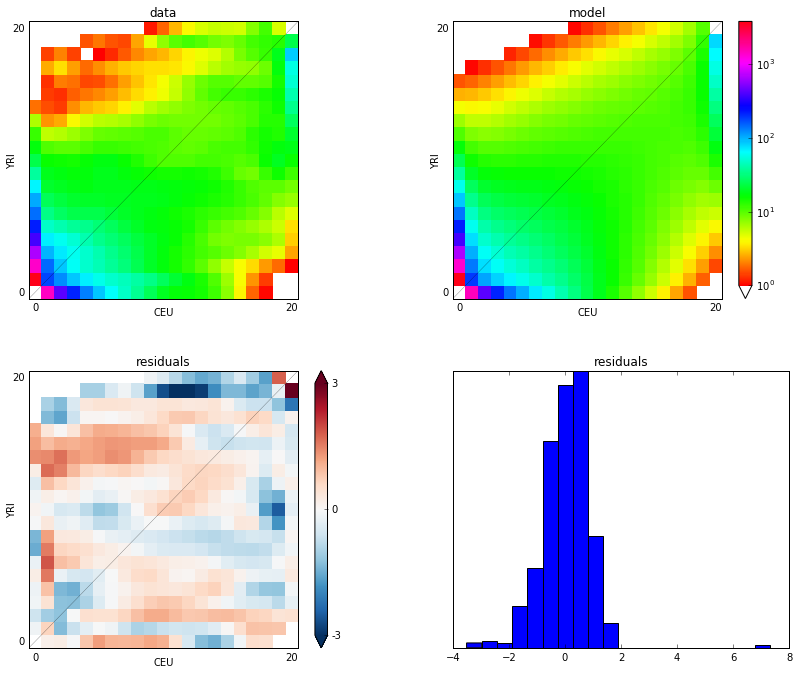

In [37]:
# plot a comparison of the model SFS with the SFS from the data

dadi.Plotting.plot_2d_comp_multinom(model, data, vmin=1, resid_range=3, pop_ids=("YRI", "CEU"))

In [162]:
# print the docstring of the function

%pdoc dadi.Plotting.plot_2d_comp_multinom

## Simulation from estimated model

The following requires that [ms](http://home.uchicago.edu/~rhudson1/source/mksamples.html) is installed.

In [38]:
# generate the core of a ms command with the optimised model parameter values

mscore = demographic_models.prior_onegrow_mig_mscore(popt)

In [39]:
# generate full ms command

mscommand = dadi.Misc.ms_command(1., ns, mscore, int(1e5)) 

Note, the ms command specifies a $\theta$ of 1 for better efficiency. The simulated spectra can be rescaled later with the `theta0` from above.

In [40]:
mscommand

'ms 40 100000 -t 1.000000 -I 2 20 20 -n 1 1.881000 -n 2 1.845000 -eg 0 2 58.694679 -ma x 1.822000 1.822000 x -ej 0.055500 2 1 -en 0.233000 1 1'

In [41]:
import os

return_code = os.system('{0} > test.msout'.format(mscommand))

In [42]:
% ll

total 33660
lrwxrwxrwx 1 claudius       53 Feb 17 15:37 ERY.FOLDED.sfs -> /data3/claudius/Big_Data/ANGSD/SFS/ERY/ERY.FOLDED.sfs
-rw-rw-r-- 1 claudius      462 Mar 15 12:48 ERY.FOLDED.sfs.dadi_format
-rw-rw-r-- 1 claudius      462 Mar 15 12:45 ERY.FOLDED.sfs.dadi_format~
lrwxrwxrwx 1 claudius       37 Feb 18 17:46 EryPar.unfolded.2dsfs -> ../../ANGSD/FST/EryPar.unfolded.2dsfs
-rw-rw-r-- 1 claudius    13051 Feb 18 19:00 EryPar.unfolded.2dsfs.dadi_format
-rw-rw-r-- 1 claudius    13051 Feb 18 18:31 EryPar.unfolded.2dsfs.dadi_format~
drwxrwxr-x 5 claudius     4096 Feb 17 13:45 examples/
-rw-rw-r-- 1 claudius   137691 Mar 19 11:19 example_YRI_CEU.ipynb
-rw-rw-r-- 1 claudius   619518 Mar 17 16:18 First_Steps_with_dadi.ipynb
-rw-rw-r-- 1 claudius     1012 Mar 16 09:54 new.bib
lrwxrwxrwx 1 claudius       53 Feb 17 15:37 PAR.FOLDED.sfs -> /data3/claudius/Big_Data/ANGSD/SFS/PAR/PAR.FOLDED.sfs
-rw-rw-r-- 1 claudius      412 Feb 17 16:29 PAR.FOLDED.sfs.dadi_format
-rw-rw-r-- 1 claudius      218 Feb

In [43]:
msdata = dadi.Spectrum.from_ms_file('test.msout')

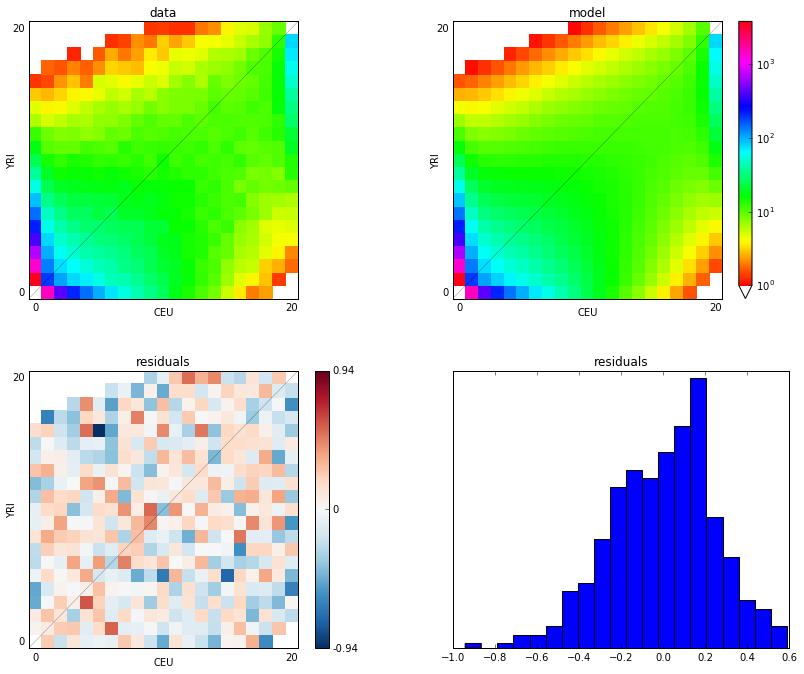

In [44]:
dadi.Plotting.plot_2d_comp_multinom(model, theta0*msdata, vmin=1, pop_ids=['YRI', 'CEU'])

The spectrum simulated with `ms` (averaged across iterations, I believe) is almost identical to the model spectrum. This confirms that $\delta$a$\delta$i's deterministic approximation is very good. One could now compare the `ms` simulated spectra to the observed spectrum.

## Parameter uncertainty 

In order to obtain confidence intervals for the parameter estimates, one needs to create conventional bootstraps over _unlinked_ loci, i. e. over contigs instead of nucleotide sites. From these bootstrapped data sets one can generate site frequency spectra and estimate model parameters as for the full observed data. However, this is computationally expensive. A more efficient alternative is calculating the Godambe Information Matrix (GIM) from the bootstrapped data sets (see Coffman2016 for details).

In [48]:
# the examples directory contains site frequency spectra from bootstraps

% ll examples/YRI_CEU/bootstraps/

total 1200
-rw-rw-r-- 1 claudius 8813 Feb 17 13:45 00.fs
-rw-rw-r-- 1 claudius 8819 Feb 17 13:45 01.fs
-rw-rw-r-- 1 claudius 8808 Feb 17 13:45 02.fs
-rw-rw-r-- 1 claudius 8794 Feb 17 13:45 03.fs
-rw-rw-r-- 1 claudius 8829 Feb 17 13:45 04.fs
-rw-rw-r-- 1 claudius 8824 Feb 17 13:45 05.fs
-rw-rw-r-- 1 claudius 8830 Feb 17 13:45 06.fs
-rw-rw-r-- 1 claudius 8816 Feb 17 13:45 07.fs
-rw-rw-r-- 1 claudius 8799 Feb 17 13:45 08.fs
-rw-rw-r-- 1 claudius 8833 Feb 17 13:45 09.fs
-rw-rw-r-- 1 claudius 8820 Feb 17 13:45 10.fs
-rw-rw-r-- 1 claudius 8833 Feb 17 13:45 11.fs
-rw-rw-r-- 1 claudius 8812 Feb 17 13:45 12.fs
-rw-rw-r-- 1 claudius 8809 Feb 17 13:45 13.fs
-rw-rw-r-- 1 claudius 8822 Feb 17 13:45 14.fs
-rw-rw-r-- 1 claudius 8838 Feb 17 13:45 15.fs
-rw-rw-r-- 1 claudius 8812 Feb 17 13:45 16.fs
-rw-rw-r-- 1 claudius 8831 Feb 17 13:45 17.fs
-rw-rw-r-- 1 claudius 8817 Feb 17 13:45 18.fs
-rw-rw-r-- 1 claudius 8826 Feb 17 13:45 19.fs
-rw-rw-r-- 1 claudius 8832 Feb 17 13:45 20.fs
-rw-rw-r-- 1 claudius 8

In [58]:
# load spectra from bootstraps of the data into an array

all_boot = [ dadi.Spectrum.from_file('examples/YRI_CEU/bootstraps/{0:02d}.fs'.format(i)) for i in range(100) ]

In [56]:
print ['{0:02d}.fs'.format(i) for i in range(100)]

['00.fs', '01.fs', '02.fs', '03.fs', '04.fs', '05.fs', '06.fs', '07.fs', '08.fs', '09.fs', '10.fs', '11.fs', '12.fs', '13.fs', '14.fs', '15.fs', '16.fs', '17.fs', '18.fs', '19.fs', '20.fs', '21.fs', '22.fs', '23.fs', '24.fs', '25.fs', '26.fs', '27.fs', '28.fs', '29.fs', '30.fs', '31.fs', '32.fs', '33.fs', '34.fs', '35.fs', '36.fs', '37.fs', '38.fs', '39.fs', '40.fs', '41.fs', '42.fs', '43.fs', '44.fs', '45.fs', '46.fs', '47.fs', '48.fs', '49.fs', '50.fs', '51.fs', '52.fs', '53.fs', '54.fs', '55.fs', '56.fs', '57.fs', '58.fs', '59.fs', '60.fs', '61.fs', '62.fs', '63.fs', '64.fs', '65.fs', '66.fs', '67.fs', '68.fs', '69.fs', '70.fs', '71.fs', '72.fs', '73.fs', '74.fs', '75.fs', '76.fs', '77.fs', '78.fs', '79.fs', '80.fs', '81.fs', '82.fs', '83.fs', '84.fs', '85.fs', '86.fs', '87.fs', '88.fs', '89.fs', '90.fs', '91.fs', '92.fs', '93.fs', '94.fs', '95.fs', '96.fs', '97.fs', '98.fs', '99.fs']


In [64]:
%%time

uncerts = dadi.Godambe.GIM_uncert(func_ex, pts_l, all_boot, popt, data, multinom=True)

CPU times: user 23.4 s, sys: 3.81 ms, total: 23.4 s
Wall time: 23.4 s


In [65]:
print 'Estimated parameter standard deviations from GIM: {0}'.format(uncerts)

Estimated parameter standard deviations from GIM: [  2.37374973e-01   1.18487380e-02   7.57283821e-01   2.53603366e-01
   2.47282936e-01   1.71900105e-02   4.08528213e+02]


## Folded data

In [67]:
# These are the optimal parameters when the spectrum is folded. They can be
# found simply by passing data.fold() to the above call to optimize_log. 

popt_fold =  numpy.array([1.907,  0.073,  1.830,  0.899,  0.425,  0.113])

In [68]:
# get standard deviations for model parameters

uncerts_folded = dadi.Godambe.GIM_uncert(func_ex, pts_l, all_boot, popt_fold, data.fold(), multinom=True)

In [72]:
print 'Folding increases parameter uncertainties by factors of: {}'.format(uncerts_folded/uncerts)

Folding increases parameter uncertainties by factors of: [ 2.38220944  1.73803606  1.52260491  1.61800623  3.9824292   2.17113759
  2.75118888]


**Outgroup information greatly increases power!**

## Likelihood Ratio Test (LRT) between models

The following will compare the model with migration with a model without migration, thus testing whether the inferred migration rate is significantly different from 0.

In [74]:
# the model without migration is also defined in the demographic_models script

func_nomig = demographic_models.prior_onegrow_nomig
func_ex_nomig = dadi.Numerics.make_extrap_log_func(func_nomig)

In [75]:
# these are the best-fit parameters for the model without migration, 
# as provided in YRI_CEU.py

popt_nomig = numpy.array([ 1.897,  0.0388,  9.677,  0.395,  0.070])

In [76]:
# get the expected AFS from the model without migration

model_nomig = func_ex_nomig(popt_nomig, ns, pts_l)

In [91]:
# get the likelihood of the data given the model without migration

ll_nomig = dadi.Inference.ll_multinom(model_nomig, data)

-1066.3460755932974

In [93]:
print 'The log likelihood of the model with migration was: {0:.1f}'.format(ll)
print 'The log likelihodd of the model without migration is: {0:.1f}'.format(ll_nomig)

The log likelihood of the model with migration was: -1066.3
The log likelihodd of the model without migration is: -1146.1


The more complex model with migration (one parameter more) has a greater likelihood as expected. But is that difference significant or just due to better being able to fit noise in the data? 

In [79]:
p_lrt = popt
p_lrt[3] = 0
print p_lrt
print popt
# the first line just creates a reference, not a copy

[1.881, 0.071, 1.845, 0, 0.355, 0.111]
[1.881, 0.071, 1.845, 0, 0.355, 0.111]


In [80]:
# best fit parameter values for the model with migration (from YRY_CEU.py)
popt = [1.881, 0.0710, 1.845, 0.911, 0.355, 0.111]

In [82]:
p_lrt = popt[:] # copy parameter list
p_lrt[3] = 0
print p_lrt
print popt

[1.881, 0.071, 1.845, 0, 0.355, 0.111]
[1.881, 0.071, 1.845, 0.911, 0.355, 0.111]


Need to calculate an adjustment factor, maybe correcting for linkage (see Coffman2016).

In [84]:
adj = dadi.Godambe.LRT_adjust(func_ex, pts_l, all_boot, p_lrt, data, nested_indices=[3], multinom=True)

In [88]:
D_adj = adj * 2 * (ll - ll_nomig)

In [89]:
print 'Adjusted D statistic: {0:.4f}'.format(D_adj)

Adjusted D statistic: 0.2811


Verbatim from `YRI_CEU.py`:
"Because this is test of a parameter on the boundary of parameter space (m cannot be less than zero), our null distribution is an even proportion of chi^2 distributions with 0 and 1 d.o.f. To evaluate the p-value, we use the point percent function for a weighted sum of chi^2 dists."

See also the manual and Coffman2016.

In [90]:
pval = dadi.Godambe.sum_chi2_ppf(D_adj, weights=(0.5, 0.5))

In [94]:
print 'p-val for rejecting the no-migration model: {0:.4f}'.format(pval)

p-val for rejecting the no-migration model: 0.2980


Adding the migration parameter does not significantly improve the fit of the model to the data. According to this data (and analysis), gene flow between YRI and CEU has not significantly affected the distribution of genetic variation as summarised in the joint SFS.